In [1]:
from music21 import *
import pandas as pd
import glob
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam

/home/eurismar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/eurismar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/bach_teste'

In [4]:
files = glob.glob('{}/*.mid*'.format(path))

In [5]:
files

['/home/eurismar/notebooks/c-rnn-gan/datadir/classical/bach_teste/air.mid']

In [7]:
coluna1 = []
coluna2 = []
midi = converter.parse(files[0])
part0 = midi[1]
melodia = part0.getElementsByClass(note.Note)
notas = melodia.getElementsByClass(note.Note)
for nota in notas:
    coluna1.append(nota.midi)
    coluna2.append(nota.duration.quarterLength)

/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: Music21DeprecationWarning: Note._getMidi was deprecated on May 2014 and will disappear at or after September 2017, v.5. use pitch.midi instead
  


In [8]:
df = pd.DataFrame({"nota":coluna1,
                   "duracao":coluna2})

In [9]:
df.head()

,duracao,nota
0,5,74
1,1,71
2,8/3,69
3,0.25,72
4,0.25,71


In [10]:
df.tail()

,duracao,nota
197,0,71
198,0.25,67
199,0.25,66
200,2/3,67
201,2,66


In [11]:
df.describe()

,nota
count,202.000000
mean,70.633663
std,3.978106
min,59.000000
25%,69.000000
50%,71.000000
75%,73.000000
max,81.000000


In [12]:
df['nota'].unique()

array([74, 71, 69, 72, 81, 76, 78, 79, 68, 64, 73, 67, 66, 75, 70, 59, 61,
       62])

In [13]:
df['duracao'].unique()

array([5.0, 1.0, Fraction(8, 3), 0.25, 0.5, 2.5, Fraction(1, 3), 2.0,
       4.75, Fraction(7, 3), 2.25, 0.75, Fraction(5, 3), 4.25, 1.25, 1.5,
       0.0, Fraction(2, 3)], dtype=object)

In [14]:
mlb = MultiLabelBinarizer()

In [15]:
mlb.fit(df.values)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [16]:
classes = mlb.classes_

In [17]:
classes

array([0.0, 0.25, Fraction(1, 3), 0.5, Fraction(2, 3), 0.75, 1.0, 1.25,
       1.5, Fraction(5, 3), 2.0, 2.25, Fraction(7, 3), 2.5,
       Fraction(8, 3), 4.25, 4.75, 5.0, 59, 61, 62, 64, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 78, 79, 81], dtype=object)

In [18]:
classes.shape

(36,)

In [19]:
labels = mlb.transform(df.values)

In [20]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
labels.shape

(202, 36)

In [22]:
array_notas = df['nota'].values.astype(int)

In [23]:
array_notas.shape

(202,)

In [24]:
array_duracao = df['duracao'].values.astype(float)

In [25]:
scaler = StandardScaler()
rawX = scaler.fit_transform(df.values)

/home/eurismar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
rawX

array([[ 5.34519105,  0.84831829],
       [ 0.37711471,  0.09231699],
       [ 2.44714651, -0.41168387],
       [-0.55439961,  0.34431742],
       [-0.55439961,  0.09231699],
       [-0.24389484,  0.34431742],
       [-0.55439961,  2.61232131],
       [-0.55439961,  0.34431742],
       [-0.24389484,  0.09231699],
       [-0.24389484,  0.09231699],
       [-0.55439961,  1.35231915],
       [-0.55439961,  0.84831829],
       [-0.55439961,  1.35231915],
       [-0.55439961,  1.85632001],
       [-0.55439961,  2.10832044],
       [-0.55439961,  1.35231915],
       [-0.24389484, -0.41168387],
       [ 2.24014333, -0.41168387],
       [-0.55439961, -0.66368431],
       [-0.45089802, -0.41168387],
       [-0.24389484,  0.09231699],
       [-0.24389484, -0.66368431],
       [-0.24389484, -0.41168387],
       [ 0.37711471, -0.41168387],
       [-0.24389484, -0.66368431],
       [ 1.61913379, -1.67168603],
       [ 5.03468627,  0.84831829],
       [-0.55439961,  0.59631785],
       [ 0.37711471,

In [27]:
scaler.inverse_transform(rawX[0])

array([ 5., 74.])

In [28]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, rawX.shape[0] - seq_length, 1):
	seq_in = rawX[i:i + seq_length]
	seq_out = labels[i + seq_length]
	dataX.append(seq_in)
	dataY.append(seq_out)
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  102


In [29]:
X = np.reshape(dataX, (len(dataX), seq_length, 2))
y = np.asarray(dataY)

In [30]:
X.shape

(102, 100, 2)

In [31]:
y.shape

(102, 36)

In [32]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, 2),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 256)          265216    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 36)                9252      
Total params: 799,780
Trainable params: 799,780
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
history = model.fit(X, y, epochs=10,batch_size=32, verbose=1, shuffle=False)

Epoch 1/10
102/102 [==============================] - 3s - loss: 0.6901 - acc: 0.6021     
Epoch 2/10
102/102 [==============================] - 1s - loss: 0.6127 - acc: 0.9142     
Epoch 3/10
102/102 [==============================] - 1s - loss: 0.2479 - acc: 0.9412     
Epoch 4/10
102/102 [==============================] - 1s - loss: 0.2782 - acc: 0.8638     
Epoch 5/10
102/102 [==============================] - 1s - loss: 0.2640 - acc: 0.8660     
Epoch 6/10
102/102 [==============================] - 1s - loss: 0.2655 - acc: 0.8521     
Epoch 7/10
102/102 [==============================] - 1s - loss: 0.2521 - acc: 0.8753     
Epoch 8/10
102/102 [==============================] - 1s - loss: 0.2337 - acc: 0.9096     
Epoch 9/10
102/102 [==============================] - 1s - loss: 0.2300 - acc: 0.9213     
Epoch 10/10
102/102 [==============================] - 1s - loss: 0.2180 - acc: 0.9330     


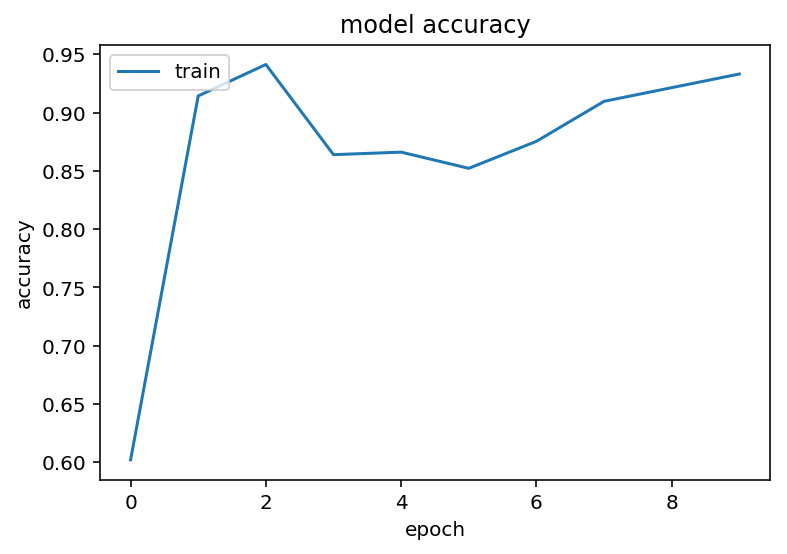

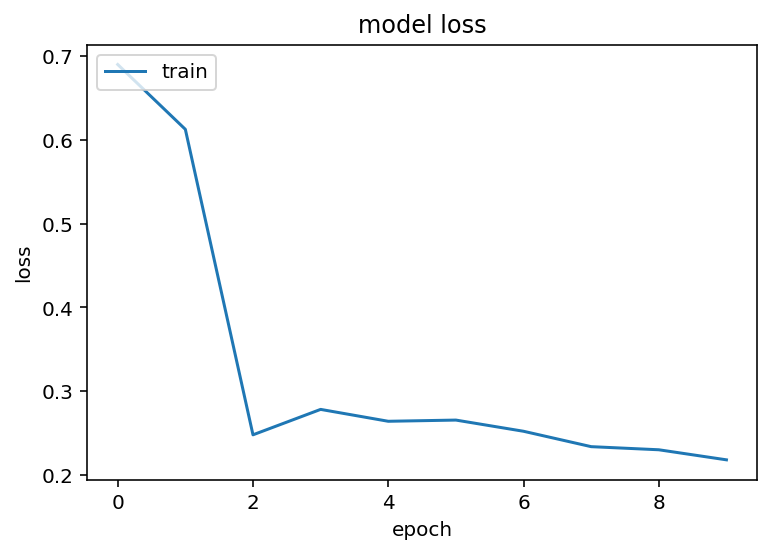

In [34]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Prevendo somente uma label**

In [35]:
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
p = np.reshape(pattern, (1, len(pattern), 2))
prediction = model.predict(p, verbose=0)
idxs = np.argsort(prediction[0])[::-1][:2]
print('idxs:',idxs)
new_pattern = [mlb.classes_[idxs[0]],mlb.classes_[idxs[1]]]
print('antes sort:',new_pattern)
new_pattern.sort()
print('depois sort:',new_pattern)
t = np.asarray(new_pattern)
t1 = t.reshape(1,2)
print(t1)
pt = scaler.transform(t1)
print(pt)

idxs: [ 1 32]
antes sort: [0.25, 76]
depois sort: [0.25, 76]
[[ 0.25 76.  ]]
[[-0.55439961  1.35231915]]


## **Prevendo uma sequencia**

In [36]:
len(dataX)

102

In [69]:
start = np.random.randint(0, len(dataX)-1)
print(start)
pattern = dataX[start]
for i in range(10):
    p = np.reshape(pattern, (1, len(pattern), 2))
    prediction = model.predict(p, verbose=0)
    idxs = np.argsort(prediction[0])[::-1][:2]
    new_pattern = [mlb.classes_[idxs[0]],mlb.classes_[idxs[1]]]
    new_pattern.sort()
    t = np.asarray(new_pattern).reshape(1,2)
    pt = scaler.transform(t)
    a = np.concatenate((pattern,pt))
    b = a[1:len(a)]
    pattern = b

23


In [70]:
inverso = scaler.inverse_transform(pattern)

In [71]:
sc = stream.Score()
for i in inverso:
    n = note.Note(midi=i[1], quarterLength=i[0])
    sc.append(n)

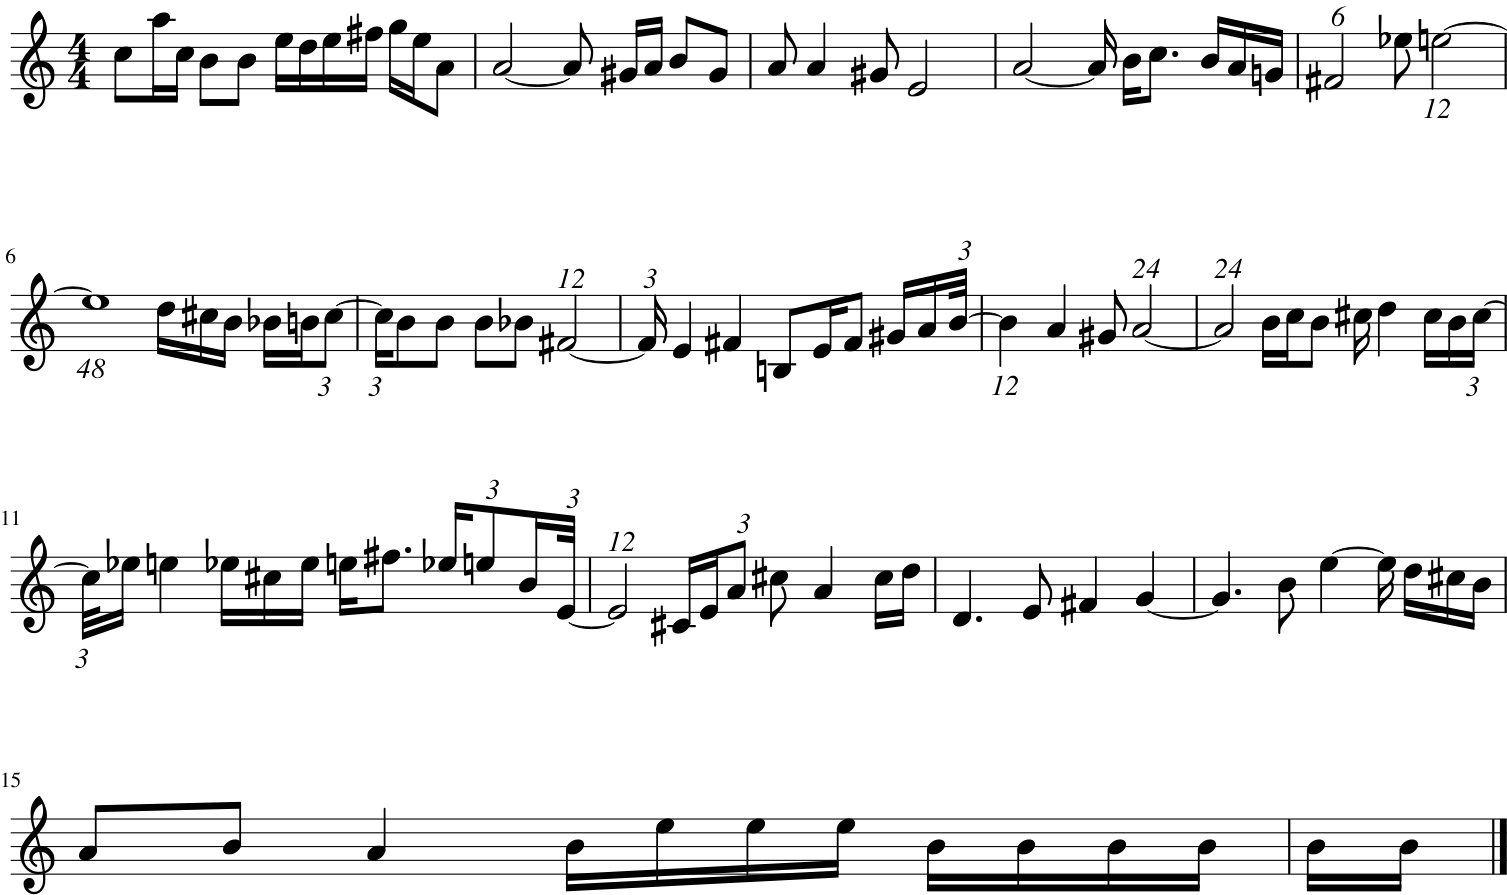

In [72]:
sc.show()

In [73]:
from music21 import *
from datetime import datetime
filename = "gerada_" + datetime.now().strftime("%Y%m%d-%H%M%S"+".mid")

In [74]:
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()

In [75]:
filename

'gerada_20180609-030018.mid'